In [151]:
#Plotter for Higgs Combine FitDiagnostics and for MonoZ datacards
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import ROOT
import uproot
import uproot_methods
import physt
from scipy import interpolate
import matplotlib._color_data as mcd
import matplotlib.patches as mpatch
from scipy.optimize import curve_fit, fsolve

plt.style.use('physics.mplstyle')

In [260]:
#Open the file and grab the histograms
fn = '/eos/user/c/cfreer/coffea_WS2.root'
f = uproot.open(fn)
histograms = f.allitems( filterclass=lambda cls: issubclass(cls, uproot_methods.classes.TH1.Methods))

In [261]:
#grab the histograms
for name, roothist in histograms:
    name = name.decode("utf-8")
    name = name.replace(";1", "")
    print(name)
    if name == "measMET_ZZTo2L2Nu_13TeV_powheg_pythia8_ext1_catSignal-0jet":
        hist = np.abs(roothist.numpy())[0] 
    if name == "genEventSumw":
        gen = np.abs(roothist.numpy())[1]

balance_ZZTo2L2Nu_13TeV_powheg_pythia8_ext1_signal
phizmet_ZZTo2L2Nu_13TeV_powheg_pythia8_ext1_signal
njet_ZZTo2L2Nu_13TeV_powheg_pythia8_ext1_signal
measMET_ZZTo2L2Nu_13TeV_powheg_pythia8_ext1_catSignal-0jet
measMET_ZZTo2L2Nu_13TeV_powheg_pythia8_ext1_catSignal-1jet
measMET_ZZTo2L2Nu_13TeV_powheg_pythia8_ext1_catNRB
measMET_ZZTo2L2Nu_13TeV_powheg_pythia8_ext1_catTOP
measMET_ZZTo2L2Nu_13TeV_powheg_pythia8_ext1_DY_cat
measMET_ZZTo2L2Nu_13TeV_powheg_pythia8_ext1_cat3L
measMET_ZZTo2L2Nu_13TeV_powheg_pythia8_ext1_cat4L
measMT_ZZTo2L2Nu_13TeV_powheg_pythia8_ext1_catSignal-0jet
measMT_ZZTo2L2Nu_13TeV_powheg_pythia8_ext1_catSignal-1jet
measMT_ZZTo2L2Nu_13TeV_powheg_pythia8_ext1_cat3L
measMT_ZZTo2L2Nu_13TeV_powheg_pythia8_ext1_cat4L
measMT_ZZTo2L2Nu_13TeV_powheg_pythia8_ext1_catNRB
measMT_ZZTo2L2Nu_13TeV_powheg_pythia8_ext1_catTOP
measMT_ZZTo2L2Nu_13TeV_powheg_pythia8_ext1_DY_cat
emuMT_ZZTo2L2Nu_13TeV_powheg_pythia8_ext1_cat3L
emuMT_ZZTo2L2Nu_13TeV_powheg_pythia8_ext1_cat4L
genEventSumw


In [262]:
gen[0]

900000.0

(array([6., 0., 2., 1., 0., 0., 1., 0., 1., 1.]),
 array([  11.76745671,  473.7587648 ,  935.75007289, 1397.74138099,
        1859.73268908, 2321.72399717, 2783.71530526, 3245.70661335,
        3707.69792145, 4169.68922954, 4631.68053763]),
 <a list of 10 Patch objects>)

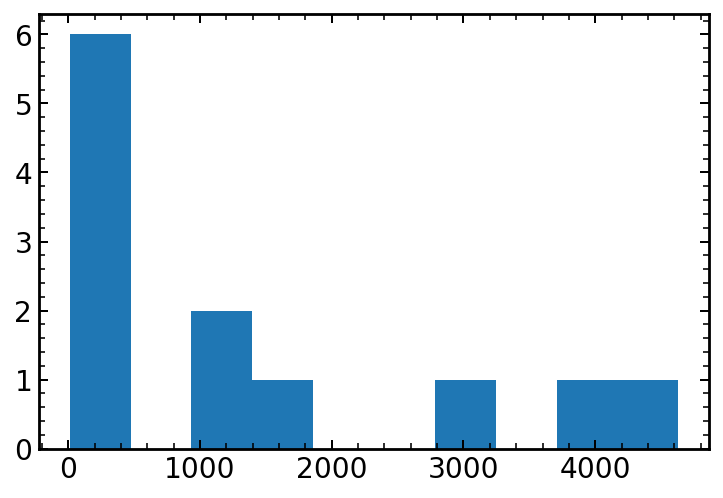

In [263]:
plt.hist(hist)

In [264]:
#Open the file and grab the histograms
file2 = '/eos/user/c/cfreer/MonoZ_WS.root'
open2 = uproot.open(file2)
histograms2 = open2.allitems( filterclass=lambda cls: issubclass(cls, uproot_methods.classes.TH1.Methods))

In [265]:
#grab the histograms
weight = open2["Runs"].array("genEventSumw").sum()
for name2, roothists in histograms2:
    name2 = name2.decode("utf-8")
    name2 = name2.replace(";1", "")
    print(name2)
    if name2 == "measMET_monoZ_catSignal-0jet":
        hist2 = np.abs(roothists.numpy())[0]

measMET_monoZ_catSignal-0jet
MT_monoZ_catSignal-0jet
measMET_monoZ_catEM
MT_monoZ_catEM
measMET_monoZ_catSignal-1jet
MT_monoZ_catSignal-1jet
measMET_monoZ_cat3L
MT_monoZ_cat3L
measMET_monoZ_cat4L
MT_monoZ_cat4L
measMET_monoZ_catNRB
MT_monoZ_catNRB
measMET_monoZ_catTOP
MT_monoZ_catTOP
measMET_monoZ_catDY
MT_monoZ_catDY
balance_monoZ
phizmet_monoZ
njet_monoZ
measMET_monoZ_catSignal-0jet_sys_ElectronEnUp
MT_monoZ_catSignal-0jet_sys_ElectronEnUp
measMET_monoZ_catEM_sys_ElectronEnUp
MT_monoZ_catEM_sys_ElectronEnUp
measMET_monoZ_catSignal-1jet_sys_ElectronEnUp
MT_monoZ_catSignal-1jet_sys_ElectronEnUp
measMET_monoZ_cat3L_sys_ElectronEnUp
MT_monoZ_cat3L_sys_ElectronEnUp
measMET_monoZ_cat4L_sys_ElectronEnUp
MT_monoZ_cat4L_sys_ElectronEnUp
measMET_monoZ_catNRB_sys_ElectronEnUp
MT_monoZ_catNRB_sys_ElectronEnUp
measMET_monoZ_catTOP_sys_ElectronEnUp
MT_monoZ_catTOP_sys_ElectronEnUp
measMET_monoZ_catDY_sys_ElectronEnUp
MT_monoZ_catDY_sys_ElectronEnUp
balance_monoZ_sys_ElectronEnUp
phizmet_monoZ_sys_

In [266]:
weight

895556.0

(array([6., 0., 2., 1., 0., 0., 1., 0., 1., 1.]),
 array([  11.767456,  473.75858 ,  935.7497  , 1397.7408  , 1859.7319  ,
        2321.7231  , 2783.714   , 3245.7053  , 3707.6965  , 4169.6875  ,
        4631.6787  ], dtype=float32),
 <a list of 10 Patch objects>)

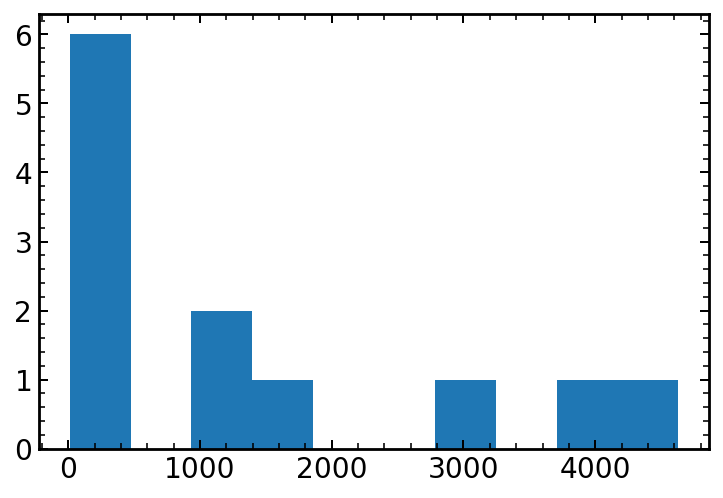

In [267]:
plt.hist(hist2)

Text(0.5, 0, '$p_{T}^{miss}$ (GeV)')

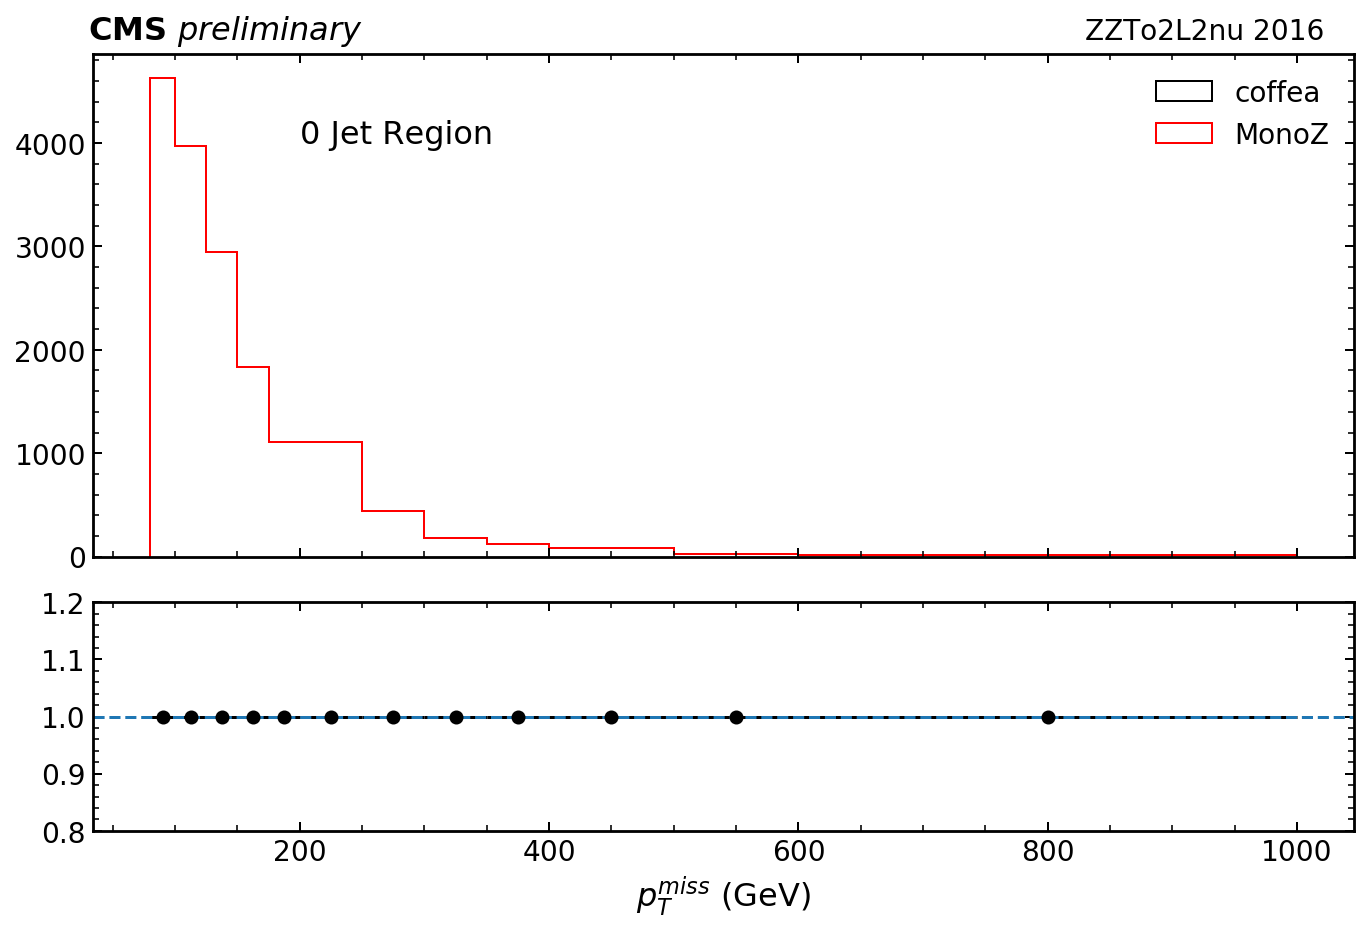

In [268]:
bins = np.array([  80.,  100.,  125.,  150.,  175.,  200.,  250.,  300.,
        350.,  400.,  500.,  600., 1000.])
binc = np.array([ 0.5*(bins[i]+bins[i+1])for i in range(bins.shape[0]-1)])
xerr = np.diff(bins)*0.5

#Set up variables for the stacked histogram
plt.figure(figsize=(12,10))
plt.gcf().subplots_adjust(bottom=0.15, left=0.17)
ax1 = plt.subplot2grid((4,1), (0,0),rowspan=2)

#hist = hist/gen[0]
#hist2 = hist2/weight

#ax1.hist(binc,bins=bins,weights=data_freq2[1:], color="black",histtype='step',label='MIT')
ax1.hist(binc,bins=bins,weights=hist, color="black",histtype='step',label='coffea')

#ax1.hist(binc,bins=bins,weights=data_chad, color="red",histtype='step',label='NEU')
ax1.hist(binc,bins=bins,weights=hist2, color="red",histtype='step',label='MonoZ')
ax1.legend(loc="upper right", fontsize=14)

cms = ax1.text(
        30, 5000., u"CMS $\it{preliminary}$",
        fontsize=16, fontweight='bold',
    )
lumi = ax1.text(
        830, 5000., r"ZZTo2L2nu 2016",
        fontsize=14, 
    )

region = ax1.text(
        200, 4000., u"0 Jet Region",
        fontsize=16,
    )

ax2 = plt.subplot2grid((4,1), (2,0),sharex=ax1)
plt.setp(ax1.get_xticklabels(), visible=False)
#ax2.errorbar(binc,np.where(data_freq2[1:]>0,data_chad/data_freq2[1:],1), xerr=xerr, color="black", fmt='o')
ax2.errorbar(binc,np.where(hist>0,hist2/hist,1), xerr=xerr, color="black", fmt='o')
ax2.axhline(1, ls="--")
ax2.set_ylim(0.8,1.2)
ax2.set_xlabel(r"$p_{T}^{miss}$ (GeV)")

In [269]:
print(gen[0],weight)

900000.0 895556.0


In [270]:
hist

array([4631.68053763, 3971.98770857, 2942.26949443, 1837.21553438,
       1104.04424439, 1107.813498  ,  443.10125442,  180.3420368 ,
        119.17857999,   78.35655804,   24.70557507,   11.76745671])

In [271]:
hist2

array([4631.6787  , 3971.9937  , 2942.27    , 1837.2163  , 1104.0444  ,
       1107.8135  ,  443.10132 ,  180.34192 ,  119.17859 ,   78.35655 ,
         24.70558 ,   11.767456], dtype=float32)

In [272]:
hist/weight

array([5.17184915e-03, 4.43521981e-03, 3.28541096e-03, 2.05148035e-03,
       1.23280314e-03, 1.23701198e-03, 4.94777830e-04, 2.01374383e-04,
       1.33077753e-04, 8.74948725e-05, 2.75868567e-05, 1.31398335e-05])

In [273]:
hist2/weight

array([5.1718471e-03, 4.4352263e-03, 3.2854115e-03, 2.0514813e-03,
       1.2328033e-03, 1.2370120e-03, 4.9477792e-04, 2.0137425e-04,
       1.3307776e-04, 8.7494867e-05, 2.7586862e-05, 1.3139833e-05],
      dtype=float32)

In [274]:
hist = hist/gen[0]
hist

array([5.14631171e-03, 4.41331968e-03, 3.26918833e-03, 2.04135059e-03,
       1.22671583e-03, 1.23090389e-03, 4.92334727e-04, 2.00380041e-04,
       1.32420644e-04, 8.70628423e-05, 2.74506390e-05, 1.30749519e-05])

In [275]:
hist2 = hist2/weight
hist2

array([5.1718471e-03, 4.4352263e-03, 3.2854115e-03, 2.0514813e-03,
       1.2328033e-03, 1.2370120e-03, 4.9477792e-04, 2.0137425e-04,
       1.3307776e-04, 8.7494867e-05, 2.7586862e-05, 1.3139833e-05],
      dtype=float32)

Text(0.5, 0, '$p_{T}^{miss}$ (GeV)')

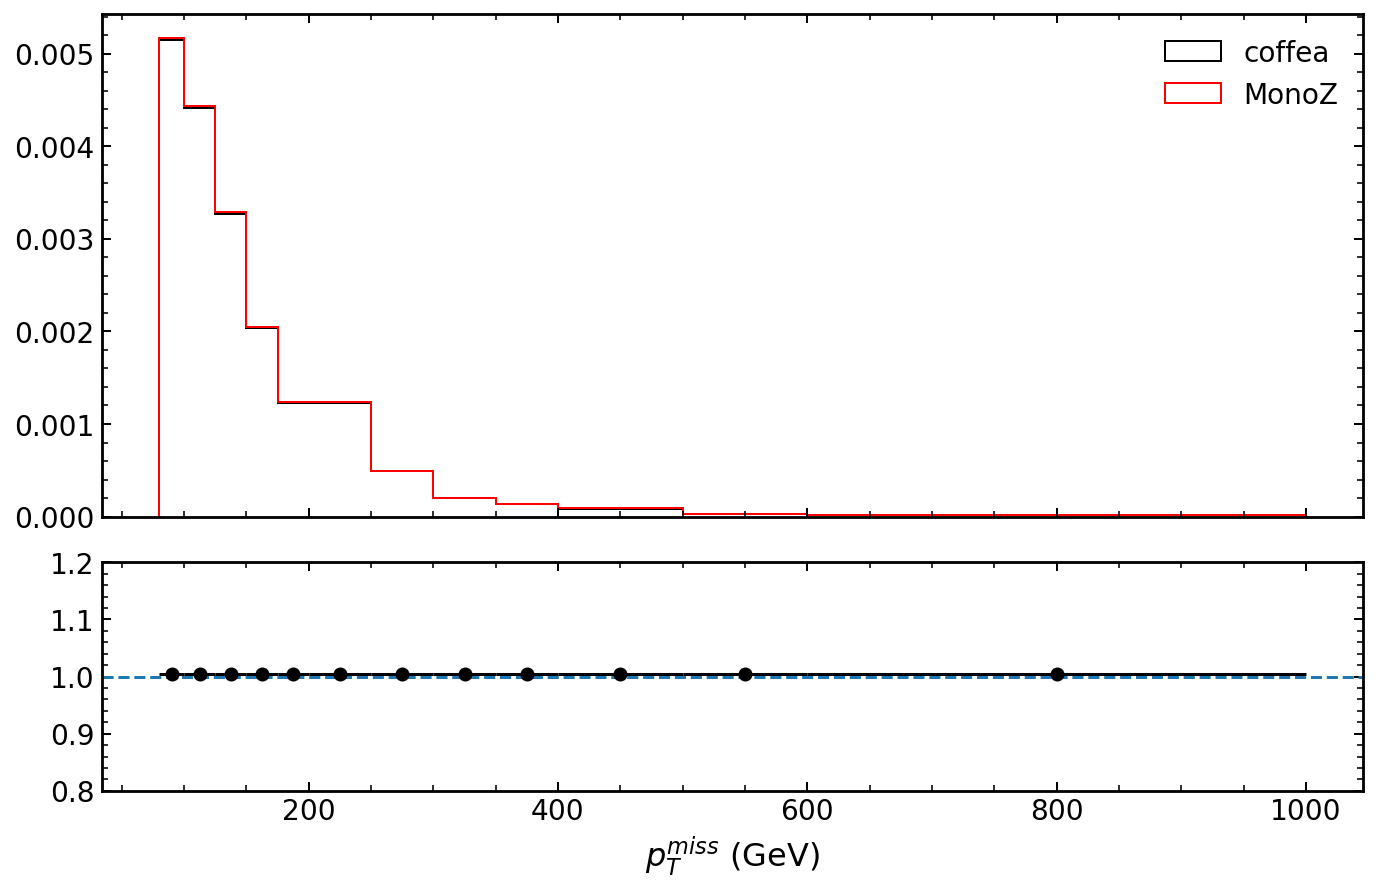

In [276]:
bins = np.array([  80.,  100.,  125.,  150.,  175.,  200.,  250.,  300.,
        350.,  400.,  500.,  600., 1000.])
binc = np.array([ 0.5*(bins[i]+bins[i+1])for i in range(bins.shape[0]-1)])
xerr = np.diff(bins)*0.5

#Set up variables for the stacked histogram
plt.figure(figsize=(12,10))
plt.gcf().subplots_adjust(bottom=0.15, left=0.17)
ax1 = plt.subplot2grid((4,1), (0,0),rowspan=2)

#ax1.hist(binc,bins=bins,weights=data_freq2[1:], color="black",histtype='step',label='MIT')
ax1.hist(binc,bins=bins,weights=hist, color="black",histtype='step',label='coffea')

#ax1.hist(binc,bins=bins,weights=data_chad, color="red",histtype='step',label='NEU')
ax1.hist(binc,bins=bins,weights=hist2, color="red",histtype='step',label='MonoZ')
ax1.legend(loc="upper right", fontsize=14)

ax2 = plt.subplot2grid((4,1), (2,0),sharex=ax1)
plt.setp(ax1.get_xticklabels(), visible=False)
#ax2.errorbar(binc,np.where(data_freq2[1:]>0,data_chad/data_freq2[1:],1), xerr=xerr, color="black", fmt='o')
ax2.errorbar(binc,np.where(hist>0,hist2/hist,1), xerr=xerr, color="black", fmt='o')
ax2.axhline(1, ls="--")
ax2.set_ylim(0.8,1.2)
ax2.set_xlabel(r"$p_{T}^{miss}$ (GeV)")